### In this homework, you are required to use your _spatial structural analysis_ skill to analyse the influence range of Morakot typhoon using IMERG satellite precipitation data. 

### In the folder _Data_IMERG_, you can find 30-min IMERG precipitation data for period of 2009/08/07 00:00 – 2009/08/09 00:00. Your main task here is to calculate the characteristic range of Typhoon Morakot for the period it passed Taiwan (i.e. 2009/08/07 15:00 – 2009/08/08 08:00 UTC time) based upon the algorithm proposed in Ochoa-Rodriguez et al. (2015) (see below, a summary of the algorithm is given). 


### A summary of this algorithm is given as follow:

(1) An empirical (or sample) variogram is computed at each time step as:

$\gamma (h) = \frac{1}{2N} \sum_{i=1}^{N} [(Z(\mathbf{x})-Z(\mathbf{x}+h))^{2}]$

where $N$ is the number of all pairs of satellite pixels separated by a distance $h$, $Z$ are the precipitation values at the respective pixels and $\mathbf{x}$ corresponds to the centre of a given pixel.

(2) Each empirical variogram is normalised by dividing it by the __sample__ variance. 

(3) The normalised variograms obtained for each time step are then averaged over the time period of analysis – This yields a climatological sample variogram.

(4) An __exponential__ variogram model is then fitted to this climatological sample variogram. The exponential variogram model is termed:

$\gamma (h) = C_{0} + C[1-e^{-\frac{h}{a}}]$

where $C_{0}$ is the nugget, $C$ is the sill and $a$ is the range. However, please note that the practical (or effective) range of the exponential model, i.e., $r=3a$, shall be used here.

(5) The integral range measure (A) is then estimated here. This measure summarises the structural information of the variogram provided by the range and the fraction of total variance. For an exponential variogram model, this measure is termed (Lantuéjoul, 1991): 

$A = \frac{2\pi r^{2}}{9}$

(6) The characteristic length scale ($r_{c}$), which represents the mean extent of the spatial structure captured by the data (Garrigues et al., 2008), can be estimated as the square root of $A$.



### References:

Garrigues et al., 2008: Quantifying spatial heterogeneity at the landscape scale using variogram models, Remote Sensing of Environment, 103(1), 81-96.

Lantuéjoul, C., 1991: Ergodicity and integral range, Journal of Microscopy, 161(3), 387-403.

Ochoa-Rodriguez et al., 2015: Impact of spatial and temporal resolution of rainfall inputs on urban hydrodynamic modelling outputs: A multi-catchment investigation, Journal of Hydrology, 531, 389-407.



### 0. Import essential modules

In [1]:
import netCDF4 as nc
import gstools as gs
import matplotlib.pyplot as plt
import numpy as np

### 1. (50%) Import IMERG data files for the period of 2009/08/07 15:00 – 2009/08/08 08:00 (including image at 2009/08/08 08:00), compute the climatological sample variogram and plot it as a scattor plot.

#### Note for the plot:
* The size of the plot is 6-inch width and 4-inch height.
* The x-axis is for distance (in degree) and the y-axis for variogram values, respectively. There shall be plot title ('Climatological variogram for Morakot'), legend ('Sample variogram') and text labels for x-axis ('distance (in degree)') and y-axis ('normalised variogram') for the plot.

In [2]:
ncdata_list = []

timestamps_0807 = ["1500", "1530", "1600", "1630", "1700", "1730", "1800", "1830", "1900",
                    "1930", "2000", "2030", "2100", "2130", "2200", "2230", "2300", "2330"]
total_time_0807 = 900

timestamps_0808 = ["0000", "0030", "0100", "0130", "0200", "0230", "0300", "0330", "0400",
                    "0430", "0500", "0530", "0600", "0630", "0700", "0730"]
total_time_0808 = 0

for timestamp in timestamps_0807:
    file_path = f"Data_IMERG/3B-HHR-L.MS.MRG.3IMERG.20090807-S{timestamp}00-E{str(int(timestamp)*100+2959).zfill(6)}.{str(total_time_0807).zfill(4)}.V06B.HDF5.nc4"
    ncdata_list.append(nc.Dataset(file_path))
    total_time_0807 += 30

for timestamp in timestamps_0808:
    file_path = f"Data_IMERG/3B-HHR-L.MS.MRG.3IMERG.20090808-S{timestamp}00-E{str(int(timestamp)*100+2959).zfill(6)}.{str(total_time_0808).zfill(4)}.V06B.HDF5.nc4"
    ncdata_list.append(nc.Dataset(file_path))
    total_time_0808 += 30

In [3]:
gamma_list=[]

for i in range(len(ncdata_list)):
    nc_fid = ncdata_list[i]
    # get variable
    lat = nc_fid.variables['lat'][:]
    lon = nc_fid.variables['lon'][:]
    rain = nc_fid.variables['precipitationCal'][:,:,:]
    # flatten
    flat_lat = np.concatenate([lat] * len(lon))
    flat_lon = np.repeat(lon, len(lat))
    flat_rain = rain[0,:,:].copy().flatten()
    # compute gamma
    bin_center, gamma = gs.vario_estimate((flat_lon, flat_lat), flat_rain)
    # normalize
    sample_variance = np.var(flat_rain, ddof=1)
    normalized_gamma = gamma/sample_variance
    gamma_list.append(normalized_gamma)

In [4]:
sample_gamma = []
for i in range(len(gamma_list[0])):
    gamma_value = np.mean([arr[i] for arr in gamma_list])
    sample_gamma.append(gamma_value)

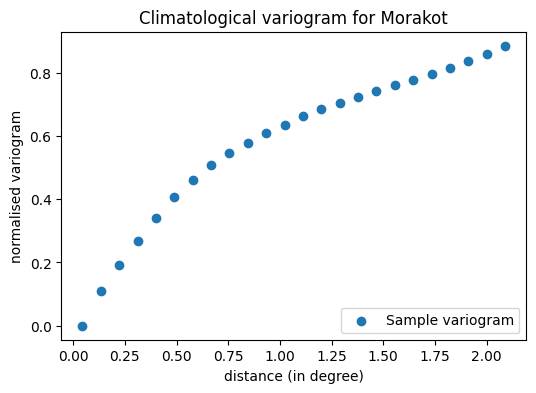

In [5]:
plt.figure(figsize=(6, 4))
plt.scatter(bin_center, sample_gamma, label='Sample variogram')
plt.title('Climatological variogram for Morakot')
plt.xlabel('distance (in degree)')
plt.ylabel('normalised variogram')
plt.legend(loc='lower right')
plt.show()

### 2. (40%) Fit this sample variogram with an exponential variogram model and output the fitted parameters, and plot the sample and the fitted variograms in a single chart.


#### Note: the print output shall look like below ():

Fitting result: nugget=XXX, range=yyy, sill=zzz (3-decimal places)

#### Note for the plot:
* The size of the plot is 6-inch width and 4-inch height.
* Use scatter plot for the sample variogram, line plot for the fitted exponential variogram.
* The x-axis is for distance (in degree) and the y-axis for variogram values, respectively. There shall be plot title ('Climatological variogram for Morakot'), legend ('Sample variogram' for the sample variogram, and 'fitted variogram' for the fitted exponential variogram) and text labels for x-axis ('distance (in degree)') and y-axis ('normalised variogram') for the plot.

Fitting result: nugget=0.000, range=0.922, sill=0.952


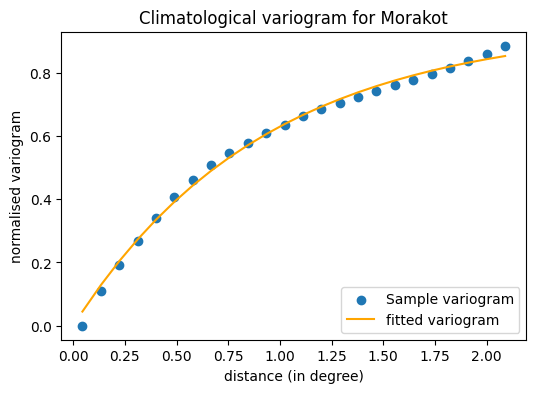

In [6]:
fit_model_exp = gs.Exponential(dim=2)
fit_model_exp.fit_variogram(bin_center, sample_gamma, nugget=True)
print(f'Fitting result: nugget={fit_model_exp.nugget:.3f}, range={fit_model_exp.len_scale:.3f}, sill={fit_model_exp.sill:.3f}')

plt.figure(figsize=(6, 4))
plt.scatter(bin_center, sample_gamma, label='Sample variogram')
plt.plot(bin_center, fit_model_exp.variogram(bin_center), color='orange', label='fitted variogram')
plt.title('Climatological variogram for Morakot')
plt.xlabel('distance (in degree)')
plt.ylabel('normalised variogram')
plt.legend(loc='lower right')
plt.show()

### 3. (20%) Derive and output the characteristic length $r_{c}$.   


#### Note: the print output shall look like below ():

The characteristic length is XXXX degree (3-decimal places)

In [7]:
alpha = fit_model_exp.len_scale
r = 3 * alpha
A = (2 * np.pi * r**2 ) / 9
r_c = np.sqrt(A)
print(f'The characteristic length is {r_c:.3f} degree')

The characteristic length is 2.312 degree
